In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

import importlib
importlib.reload(api_keys)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [136]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities[0:5])
print(len(cities))

['lae', 'arraial do cabo', 'kapaa', 'chegdomyn', 'bluff']
624


## Perform API Calls

In [139]:
raw_data = {
    'City Name': [],
    'Latitude': [],
    'Temperature': [], 
    'Humidity': [],
    'Cloudiness': [],
    'Wind Speed': []}


# # # OpenWeatherMap API Key
api_key = api_keys.api_key

# # # Starting URL for Weather Map API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

i = 0

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        raw_data["City Name"].append(city)
        raw_data["Latitude"].append(weather_json["coord"]["lat"])
        raw_data["Temperature"].append(weather_json["main"]["temp"])
        raw_data["Humidity"].append(weather_json["main"]["humidity"])
        raw_data["Cloudiness"].append(weather_json["clouds"]["all"])
        raw_data["Wind Speed"].append(weather_json["wind"]["speed"])

        print(str(i) + ". " + city)
        i += 1
#     time.sleep(1)

df = pd.DataFrame(raw_data)
df

0. lae
1. arraial do cabo
2. kapaa
3. chegdomyn
4. bluff
5. vostok
6. roebourne
7. barrow
8. dingle
9. luderitz
10. qaanaaq
11. mataura
12. iqaluit
13. sibolga
14. belfast
15. turukhansk
16. calama
17. yerbogachen
18. marmande
19. busselton
20. burgthann
21. chokurdakh
22. sambava
23. saint george
24. bambous virieux
25. tasiilaq
26. dunedin
27. ribeira grande
28. kodiak
29. marawi
30. richards bay
31. punta arenas
32. rikitea
33. nirmali
34. keti bandar
35. cidreira
36. la ronge
37. bredasdorp
38. tuktoyaktuk
39. san patricio
40. pascagoula
41. college
42. baie-comeau
43. agutaya
44. san cristobal
45. gavle
46. ossora
47. souillac
48. wakkanai
49. jamestown
50. kangaatsiaq
51. victoria
52. flagstaff
53. butaritari
54. georgetown
55. axim
56. alofi
57. lata
58. airai
59. andilamena
60. paamiut
61. nueva helvecia
62. ushuaia
63. torbay
64. rantepao
65. wenling
66. hobart
67. tazovskiy
68. severo-kurilsk
69. saint-georges
70. skjervoy
71. anloga
72. port lincoln
73. chimbote
74. cape tow

,City Name,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,lae,-6.72,66.02,100,92,1.59
1,arraial do cabo,-22.97,71.60,73,40,23.04
2,kapaa,22.08,75.04,83,1,10.29
3,chegdomyn,51.13,48.47,95,0,3.15
4,bluff,-23.58,42.44,60,0,6.96
5,vostok,46.45,54.50,92,68,1.92
6,roebourne,-20.77,44.96,77,0,2.93
7,barrow,-38.31,61.61,77,88,4.50
8,dingle,11.00,78.98,79,8,12.66
9,luderitz,-26.65,56.21,75,0,17.81


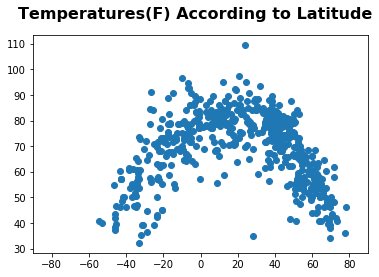

In [140]:
temp_plot = plt.scatter(raw_data["Latitude"], raw_data["Temperature"])
plt.xlim(-90, 90)
plt.suptitle("Temperatures(F) According to Latitude", fontsize=16, fontweight="bold")
plt.show()

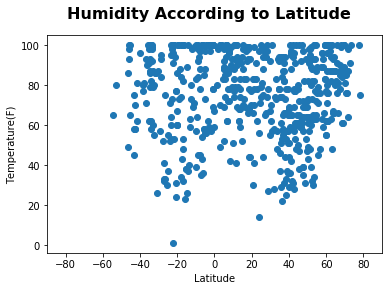

In [141]:
humidity_plot = plt.scatter(raw_data["Latitude"], raw_data["Humidity"])
plt.xlim(-90, 90)
plt.suptitle("Humidity According to Latitude", fontsize=16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.show()

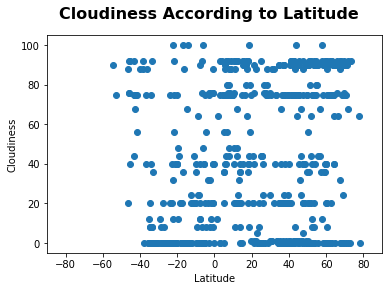

In [142]:
cloud_plot = plt.scatter(raw_data["Latitude"], raw_data["Cloudiness"])
plt.xlim(-90, 90)
plt.suptitle("Cloudiness According to Latitude", fontsize=16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

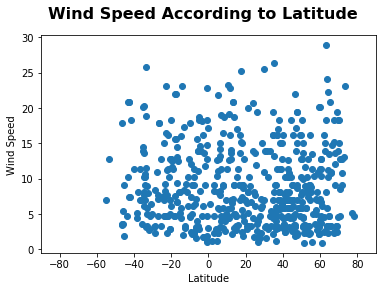

In [143]:
wind_plot = plt.scatter(raw_data["Latitude"], raw_data["Wind Speed"])
plt.xlim(-90, 90)
plt.suptitle("Wind Speed According to Latitude", fontsize=16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

In [144]:
print("1) The closer we get to the equator, the more the temperature increases." +
    "\n2) There are more places with higher humidity than low humidity." +
    "\n3) Cloudiness is pretty evenly scattered." +
    "\n4) There are more areas with lower wind speed than high wind speeds.")


1) The closer we get to the equator, the more the temperature increases.
2) There are more places with higher humidity than low humidity.
3) Cloudiness is pretty evenly scattered.
4) There are more areas with lower wind speed than high wind speeds.
